In [85]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline

##### Loading the Dataset

In [86]:
df = pd.read_csv('Downloads/bankdata.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [87]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [88]:
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [89]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [90]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [91]:
df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

#### Visualizing the Data

In [92]:
import seaborn as sns

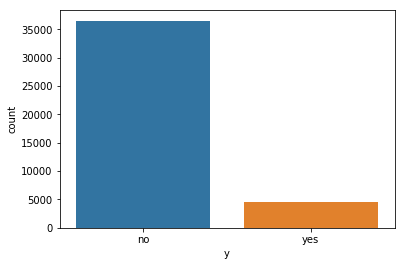

In [93]:
sns.countplot(x='y', data=df)

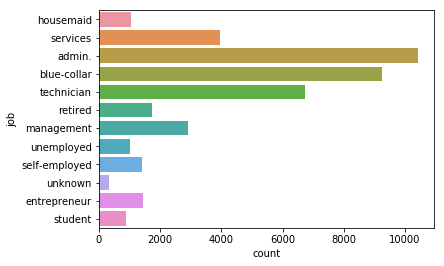

In [94]:
sns.countplot(y='job', data=df)

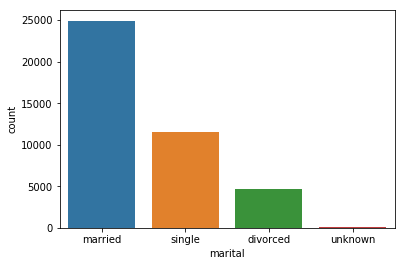

In [95]:
sns.countplot(x='marital', data=df)

In [96]:
df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

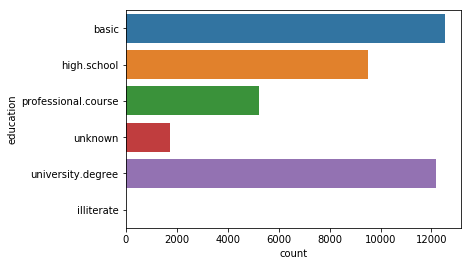

In [97]:
sns.countplot(y='education', data=df)

In [98]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Pre Processing

##### Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1

In [99]:
le = preprocessing.LabelEncoder()

In [100]:
df.job = le.fit_transform(df.job)

In [101]:
df.marital = le.fit_transform(df.marital)

In [102]:
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)


In [103]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,1,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,1,2,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,1,0,2,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [104]:
df.shape

(41188, 15)

In [105]:
X = df.iloc[:,0:14]
X[0:10]

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,1,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,1,2,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,1,0,2,1,0,1,1.1,93.994,-36.4,4.857,5191.0
5,45,7,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
6,59,0,1,3,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
7,41,1,1,5,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
8,24,9,2,3,2,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
9,25,7,2,1,2,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0


In [106]:
y = df.iloc[:,14]
y[0:10]


0    no
1    no
2    no
3    no
4    no
5    no
6    no
7    no
8    no
9    no
Name: y, dtype: object

#### Train and Test split

In [107]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split


In [108]:
x_train.shape, y_train.shape

((32950, 14), (32950,))

In [109]:
x_test.shape, y_test.shape

((8238, 14), (8238,))

In [110]:
import warnings
warnings.filterwarnings('ignore')

#### Training the model

##### We will make use of different classification algorithms to train this data set and will record the accuracy on test set.

#### Logistic Regression

In [111]:
model=LogisticRegression(penalty='l2', max_iter=1000)

In [112]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
prediction=model.predict(x_test)
prediction

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8999757222626851

In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[7258   61]
 [ 763  156]]


#### Support Vector Machine (SVM

In [116]:
from sklearn.svm import SVC
clf = SVC()

In [117]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [118]:
pred = clf.predict(x_test)
pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [119]:
accuracy_score(y_test, pred)

0.8948773974265598

#### Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [121]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
predict = rfc.predict(x_test)

In [123]:
predict

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [124]:
accuracy_score(y_test, predict)

0.8909929594561787